In [493]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
import scipy
import sklearn

In [494]:
contents = open("data/(1) The Hunger Games.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(2) Catching Fire.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.1) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/(3.2) Mockingjay.txt", "r", encoding='utf-8').read()
contents = contents + " " + open("data/Lords of the Rings.txt", "r").read()
contents = contents + " " + open("data/Pride and Prejudice.txt", "r").read()

In [495]:
sentences = contents.lower().replace("\r\n", " ").replace("\r", " ").replace("\n", " ").replace(';', ' ').replace(',', ' ').replace('?', ' ').replace('"', ' ').replace("'", ' ').replace(":", ' ').replace("*", ' ').replace("#", ' ').replace("[", ' ').replace("]", ' ').replace("-", ' ').split(".")

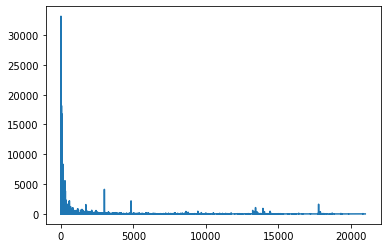

2511


In [496]:
# create dictionary
dictionary = []
tmp_dictionary = {}
#words_vector = new array()
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    for word in words:
        if len(word.strip()) > 0:
            if word not in tmp_dictionary:
                tmp_dictionary[word] = 0
            tmp_dictionary[word] += 1
            
plt.plot(list(tmp_dictionary.values()))
plt.show()
            
# keep only frequent words occurences
mean = mean(tmp_dictionary.values())
stdev = stdev(tmp_dictionary.values())

for word in tmp_dictionary:
    if tmp_dictionary[word] > 20 and len(word) > 1 and not word.isnumeric():
        dictionary.append(word)
        
print(len(dictionary))

In [497]:
# get vector dimensions
tmp_vector_dimensions = {}
vector_dimensions = []
for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension not in tmp_vector_dimensions:
                tmp_vector_dimensions[dimension] = 0
            tmp_vector_dimensions[dimension] += 1
            prev_word = word
            
# keep only frequent dimensions occurences
for dimension in tmp_vector_dimensions:
    if tmp_vector_dimensions[dimension] > 50:
        vector_dimensions.append(dimension)

print(len(vector_dimensions))

803


In [498]:
# create words vector
words_vector = np.zeros((len(dictionary), len(vector_dimensions)))

for i in range (0, len(sentences)):
    words = sentences[i].split(" ")
    prev_word = ''
    for i in range(0, len(words)):
        word = words[i]
        if word in dictionary:
            next_word = ''
            if i < len(words) - 1: next_word = words[i + 1]
            dimension = prev_word + "_XXX_" + next_word
            if dimension in vector_dimensions:
                words_vector[dictionary.index(word), vector_dimensions.index(dimension)] += 1

In [499]:
#normalize and reduce dimensions
words_vector = normalize(words_vector, axis=1, norm='l1')

pca = PCA(n_components = 2)
vector_2D = pca.fit_transform(words_vector)

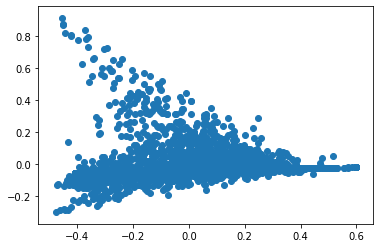

In [500]:
#plot data
plt.scatter(vector_2D[:,0], vector_2D[:,1])
plt.show()

In [501]:
# compute distance matric
dist_matrix = sklearn.metrics.pairwise.euclidean_distances(words_vector)

In [512]:
xxx = np.argmin(np.where(dist_matrix == 0, 9999, dist_matrix), axis=1)
i = 0;
for x in xxx:
    w1 = dictionary[i]
    w2 = dictionary[x]
    dist = dist_matrix[dictionary.index(w1), dictionary.index(w2)]
    if dist < 0.01: 
        print(w1 + " - " + w2 + " - " + str(dist))
    i += 1

hey - mr - 0.0030610683168290293
greasy - mr - 0.0030610683168290293
nearby - thirty - 0.009065471553679323
actual - mr - 0.0030610683168290293
endless - mr - 0.0030610683168290293
double - mr - 0.0030610683168290293
eastern - mr - 0.0030610683168290293
fifteen - mr - 0.0030610683168290293
don - wasn - 0.00817366349707064
yeah - mr - 0.0030610683168290293
thirty - nearby - 0.009065471553679323
catos - mr - 0.0030610683168290293
wasn - don - 0.00817366349707064
sir - exceedingly - 0.006332299533014166
tock - mr - 0.0030610683168290293
minas - mr - 0.0030610683168290293
mrs - mr - 0.0030610683168290293
northern - mr - 0.0030610683168290293
exceedingly - sir - 0.006332299533014166
southern - mr - 0.0030610683168290293
mr - hey - 0.0030610683168290293
“oh - mr - 0.0030610683168290293
de - mr - 0.0030610683168290293


In [518]:
dist_matrix[dictionary.index("mountain"), dictionary.index("lady")]

0.2261430961329106